# **Deep Learning Project 4 - Hand Written Digit Prediction :**
- ### Write a program that takes in the MNIST dataset of 28x28 pixel images and trains a machine learning model to recognize handwritten digits.

- ### The program should be able to handle a labelled dataset of 60,000 images and use this data to train multiple machine learning models.

- ### Your task is to compare the accuracy of different models for recognizing handwritten digits from the MNIST dataset. You can use metrics such as accuracy or F1 score to evaluate the performance of each model.
---
# **Importing necessary libraries :**


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Importing the **MNIST** dataset and loading it into training and testing sets (x_train, y_train for training and x_test, y_test for testing) :

In [40]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### **x :** Represents the image data itself. Each element in 'x' is a 28 x 28 array representing the pixel values of a handwritten digit image. These are the input features for our model.

- ### **y :** Represents the labels or the targets. Each element in 'y' is an integer between 0 and 9, corresponding to the digit that the image in 'x' represents. These are the desired output that our model should predict.
---
## Printing the shape of the x_test dataset, which represents the testing images, and will output (10000, 28, 28) :
- ### **10000 :** This represents the number of images in the x_test dataset. There are 10,000 images used for testing the model.
- ### **28 :** This represents the height (number of rows of pixels) of each image in pixels.
- ### **28 :** This represents the width (number of columns of pixels) of each image in pixels.

In [41]:
print(x_test.shape)

(10000, 28, 28)


## Displaying the 91st image in the training dataset **x_train** in **grayscale** using **Matplotlib** :

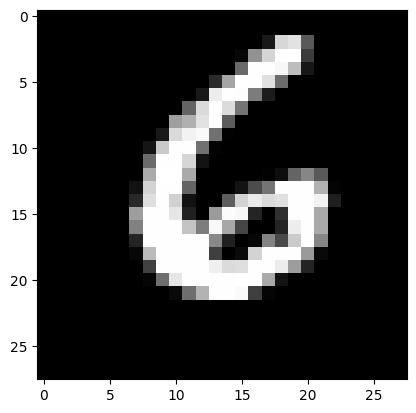

In [42]:
plt.imshow(x_train[90], cmap = 'gray')

# Normalizing the pixel values of the images to the range of 0 to 1 :

In [43]:
x_train = x_train/255.0
x_test = x_test/255.0

## Flattening each image in x_train and x_test into a 1D array while keeping the number of samples same :
---
- ### **'x_train.shape[0]' :** is the number of images in the training set. This ensures the same number of images are retained.
- ### **'-1' :** in reshape automatically calculates the remaining dimension to flatten the 2D image (28x28) into a 1D array (784).
- ### This is necessary for feeding data into certain machine learning models which expect a 1D input for each sample.

In [44]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [46]:
x_train.shape

(60000, 784)

## Converting class labels in **y_train** and **y_test** to one-hot encoded vectors for multi-class classification :
---
- ### **tf.keras.utils.to_categorical :** This function is used for one-hot encoding. One-hot encoding transforms categorical data (like class labels) into a numerical format suitable for machine learning models.
- ### **y_train, y_test :** These are the target variables representing the class labels for the training and testing datasets, respectively. In MNIST, these labels are integers ranging from 0 to 9, representing the digits.
- ### **10 :** This argument specifies the number of classes in the dataset. Since MNIST has 10 digits (0-9), we set it to 10.
## **In essence :**

- ### The lines take the original class labels in y_train and y_test and convert them into one-hot encoded vectors. For instance, if a label is '5', it gets transformed into a vector like [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], where the '1' at the 6th position represents the digit '5'.

In [45]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Defining a **Fully Connected Model**, also known as a **Densely Connected Model or a Multilayer Perceptron (MLP)** :
---
- ### Below code defines a sequential model using Keras and adds layers to it for a deep learning task, likely image classification :
- ### **model = Sequential() :** Creates a sequential model, which is a linear stack of layers.
- ### **model.add(Dense(units = 128, input_shape = (784, ), activation = "relu")) :** Adds the first layer, a dense (fully connected) layer with 128 neurons. input_shape = (784, ) specifies the input data shape, which is a 1D array of 784 elements (likely representing a flattened 28x28 image). activation = "relu" uses the ReLU activation function for non-linearity.
- ### **model.add(Dense(units = 128, activation = "relu")) :** Adds a second dense layer, also with 128 neurons and ReLU activation.
- ### **model.add(Dropout(0.25)) :** Adds a dropout layer with a rate of 0.25. Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 during training.
- ### **model.add(Dense(units = 128, activation = "softmax")) :** Adds the output layer, a dense layer with 128 neurons and softmax activation. Softmax is often used in multi-class classification to produce probability distributions over the classes.

In [47]:
model = Sequential() # Creates a sequential model, which is a linear stack of layers
model.add(Dense(units = 128, input_shape = (784, ), activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Below code configures the model for training and displays its structure :
---
- ### **model.compile(...) :** This line is crucial for setting up the training process of our neural network. Let's understand the arguments:

- ### **loss = "categorical_crossentropy" :** This specifies the loss function used to measure the difference between the model's predictions and the actual labels. Categorical cross-entropy is commonly used for multi-class classification problems like this one, where the goal is to predict one of several possible categories (digits 0-9 in this case). It calculates the loss based on the probability distribution predicted by the model and the true labels. The goal during training is to minimize this loss.

- ### **optimizer = "adam" :** This defines the optimization algorithm used to update the model's weights during training to minimize the loss function. Adam (Adaptive Moment Estimation) is a popular optimization algorithm that adapts the learning rate for each weight individually, leading to faster and more stable convergence. It combines the benefits of two other optimizers, AdaGrad and RMSProp.

- ### **metrics = ["accuracy"] :** This specifies the metrics used to evaluate the model's performance during and after training. In this case, accuracy is used, which measures the percentage of correctly classified samples. The model will track and report the accuracy during training, allowing us to monitor its progress.

- ### **model.summary() :** This line prints a summary of the model's architecture, including the layers, their output shapes, and the number of parameters in each layer. This summary is helpful for understanding the model's structure and complexity.

- ### **model.compile :** configures the training process by defining how the model learns from the data (loss function and optimizer) and how its performance is measured (metrics).
- ### **model.summary :** provides a concise overview of the model's structure.

In [48]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Total params - 133,504 (521.50 KB) :** This line indicates the total number of parameters in our model, which is 133,504. It also shows the approximate size of these parameters in memory, which is 521.50 KB. This includes all the weights and biases in all layers of our model.

- ### **Trainable params - 133,504 (521.50 KB) :** This line specifies the number of parameters in our model that will be adjusted during the training process. In this case, all 133,504 parameters are trainable, meaning they will be updated to optimize the model's performance. It also shows the memory size of these trainable parameters.

- ### **Non-trainable params - 0 (0.00 B) :** This line indicates the number of parameters in our model that are not trainable. These parameters are usually fixed and won't be changed during training. In our case, there are no non-trainable parameters, which is typical for simpler models. It also displays the memory size, which is 0 bytes since there are no non-trainable parameters.

## **In essence :**

- ### Our model has a total of 133,504 parameters, all of which are trainable and will be adjusted during the training process to improve the model's accuracy in recognizing handwritten digits. There are no fixed, non-trainable parameters in our model. The total size of these parameters in memory is approximately 521.50 KB.
---
## Below code trains the defined neural network model using training data (x_train, y_train) with a batch size of 512 and for 10 epochs :

In [49]:
model.fit(x = x_train, y = y_train, batch_size = 512, epochs = 10)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7082 - loss: 1.0141
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9281 - loss: 0.2417
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9502 - loss: 0.1713
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9596 - loss: 0.1346
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9686 - loss: 0.1069
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9736 - loss: 0.0905
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9765 - loss: 0.0773
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9818 - loss: 0.0639
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9822 - loss: 0.0581
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9841 - loss: 0.0517


## Below code evaluates the trained model's performance on the test data (x_test, y_test) and returns the loss and accuracy :

In [50]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9742 - loss: 0.0842


### Accuracy 97.42% and loss 0.0842 indicate high performance in recognizing handwritten digits.